In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
df['item_price'] = df['item_price'].str.replace('$', '').astype('float')
print(df['item_price'].dtypes)

float64


In [9]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


## Create a histogram of the top 5 items bought

In [14]:
top = df.groupby('item_name').sum()

top = top.sort_values(by='quantity', ascending=False).head(5)
top.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",7342.73
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",5575.82
Chips and Guacamole,449959,506,0,2201.04
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",3851.43
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,438.75


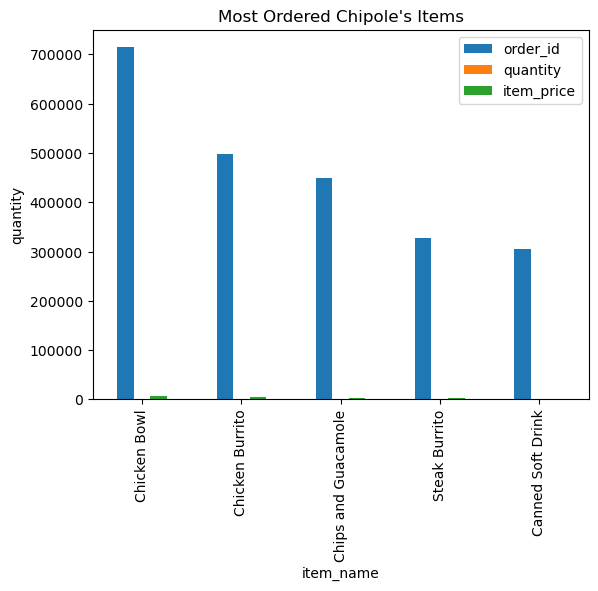

In [15]:
top.plot(kind='bar')

plt.xlabel('item_name')
plt.ylabel('quantity')
plt.title('Most Ordered Chipole\'s Items')

plt.show()

## Create a scatterplot with the number of items ordered per order price

In [17]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


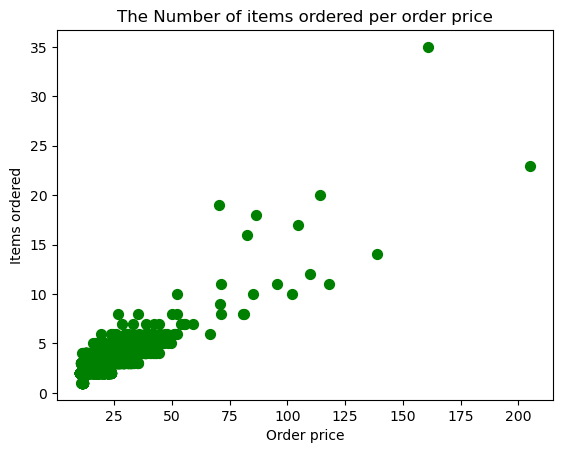

In [19]:
# the number of items ordered per order price
# 주문 가격당 주문한 품목 수

per_price = df.groupby('order_id').sum()
per_price.head()

plt.scatter(x=per_price['item_price'], y=per_price['quantity'], s=50, c='green')

plt.xlabel('Order price')
plt.ylabel('Items ordered')
plt.title('The Number of items ordered per order price')

plt.show()

### Shift + Tab: 도움말 툴팁 표시